In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
UPDATE_DATASETS = True
DATA_DIR = '../data/synthetic/'
SOURCE_DATA_DIR = '../source_data/'

# Synthetic dataset 1

In [3]:
def dataset1(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
            L += [1]
        else:
            L += [0]
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax]
    return np.array(X).reshape(-1, 1), np.array(L)

In [7]:
dir_path = f"{DATA_DIR}/synthetic_dataset_1/"
N_tot = 1000

for i in range(10):
    
    X, L = dataset1(period=100, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

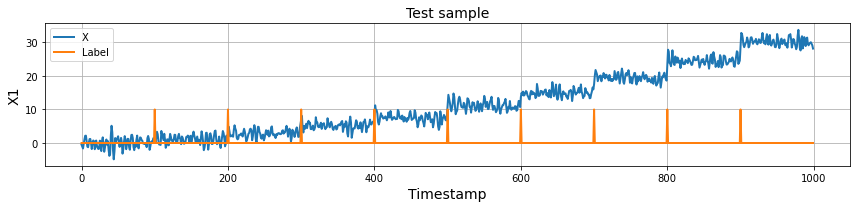

In [8]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 2

In [9]:
def dataset2(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            L += [1]
        else:
            L += [0]
        if N % 2 == 1:
            sigma = 1
        if N % 2 == 0:
            sigma = 1 + 0.25 * N#np.log(np.e + N / 1.)
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax] 
    return np.array(X).reshape(-1, 1), np.array(L)

In [10]:
dir_path = f"{DATA_DIR}/synthetic_dataset_2/"
N_tot = 1000

for i in range(10):
    
    X, L = dataset2(period=100, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

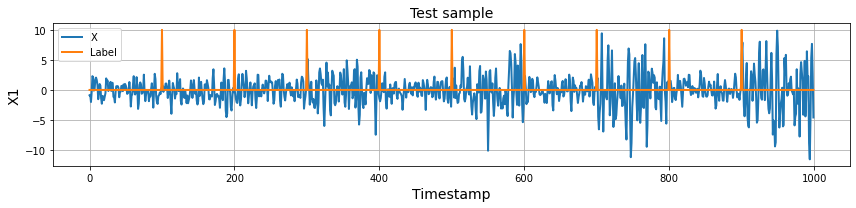

In [11]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 3

In [12]:
def dataset3(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.multivariate_normal(mean=[0, 0], cov=[[1, -0.8], [-0.8, 1]], size=1)[0], 
         np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8],  [ 0.8, 1]], size=1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            L += [1]
        else:
            L += [0]
        if N % 2 == 1:
            cov = [[1, -0.8-0.002*N], [-0.8-0.002*N, 1]]
        if N % 2 == 0:
            cov = [[1, 0.8+0.002*N], [0.8+0.002*N, 1]]
        T += [i]
        ax = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=1)[0]
        X += [ax]
    return np.array(X), np.array(L)

In [13]:
dir_path = f"{DATA_DIR}/synthetic_dataset_3/"
N_tot = 1000

for i in range(10):
    
    X, L = dataset3(period=100, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['X2'] = X[:, 1]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

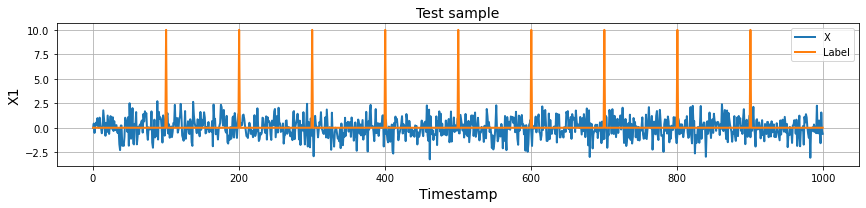

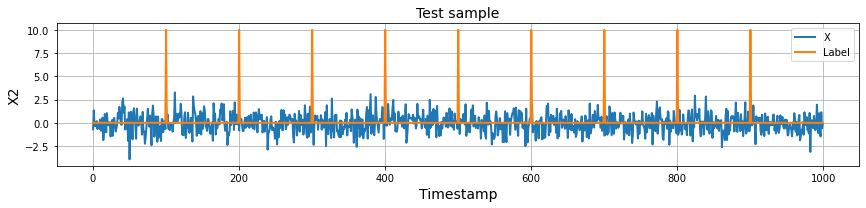

In [14]:
# Display test sample
for i in range(2):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 4

In [15]:
def dataset4(period=200, N_tot=1000):
    mu = 0
    sigma = 0.8
    w = 1.
    N = 1
    
    T = [0, 1]
    X = [np.sin(w * 0) + np.random.normal(0, 0.5, 1), 
         np.sin(w * 1) + np.random.normal(0, 0.5, 1)]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            w = w * np.log(np.e + 0.5 * N)
            L += [1]
        else:
            L += [0]
        T += [i]
        ax = np.sin(w * i) + np.random.normal(0, 0.5, 1)
        X += [ax]
    return np.array(X).reshape(-1, 1), np.array(L)

In [16]:
dir_path = f"{DATA_DIR}/synthetic_dataset_4/"
N_tot = 1000

for i in range(10):
    
    X, L = dataset4(period=100, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

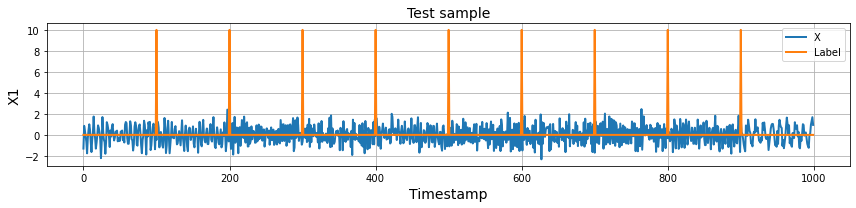

In [17]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 5

In [25]:
def dataset5(std=0.2,max_horizon=3,size=500,first_diff=False,train=False,normalize=False):
    t = np.linspace(-10,10,size)
    X = np.expand_dims(np.where(t>0,t,np.zeros_like(t)),0)+std*np.random.randn(size)
    X = X.transpose()
    if normalize: X = (X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
    if first_diff: X = X[1:] - X[:-1]
    n_obs = X.shape[0]
    D = 1
    y = np.zeros(n_obs)
    y[size//2] = 1
    return X, y            

In [26]:
dir_path = f"{DATA_DIR}/synthetic_dataset_5/"

for i in range(10):
    
    X, L = dataset5()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

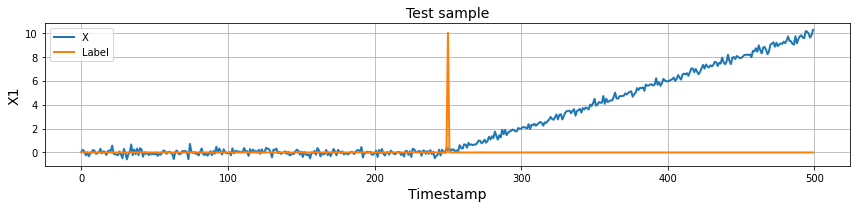

In [27]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 6

In [13]:
def datasetStep(std=0.5,amp=1,max_horizon=3,size=500,first_diff=False,train=False,normalize=False):
    t = np.linspace(-10,10,size)
    X = np.expand_dims(np.where(t>0,amp*np.ones_like(t),np.zeros_like(t)),0)+std*np.random.randn(size)
    X = X.transpose()
    if normalize: X = (X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
    if first_diff: X = X[1:] - X[:-1]
    n_obs = X.shape[0]
    D = 1
    y = np.zeros(n_obs)
    y[size//2] = 1
    return X, y            

In [28]:
dir_path = f"{DATA_DIR}/synthetic_dataset_6/"

for i in range(10):
    
    X, L = datasetStep()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

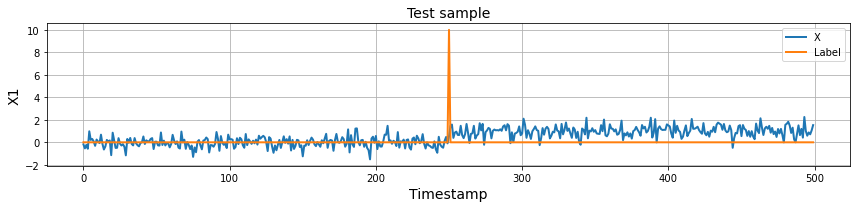

In [29]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 7

In [33]:
dir_path = f"{DATA_DIR}/synthetic_dataset_7/"

for i in range(10):
    
    X, L = datasetStep(amp=4)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

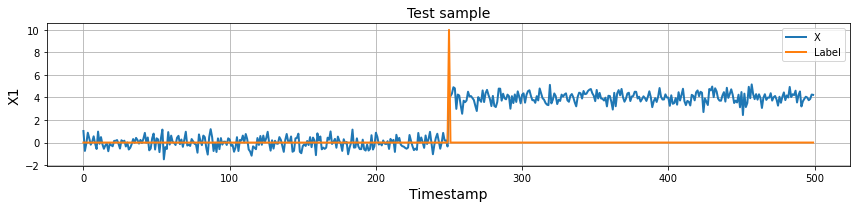

In [34]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 8

In [6]:
dir_path = f"{DATA_DIR}/synthetic_dataset_8/"

In [4]:
def relu_plus_steps(relu_locations=[-6]+[0]*2+[7]*10,
                    steps_locations=[-3,-8,3],
                    step_amp=4,relu_angle=1, std=0.3,
                    max_horizon=3,size=500,first_diff=False,
                    train=False,normalize=False):
    t = np.linspace(-10,10,size)
    X = np.expand_dims(std*np.random.randn(size),0)
    for relu_location in relu_locations:
        X += np.expand_dims(np.where(t>relu_location,relu_angle*t,np.zeros_like(t)),0)
        X -= np.expand_dims(np.where(t>relu_location,relu_angle*relu_location*np.ones_like(t),np.zeros_like(t)),0)
    X -= np.expand_dims(np.where(t>-6,20*np.ones_like(t),np.zeros_like(t)),0)
    for step_location in steps_locations:
        X += np.expand_dims(np.where(t>step_location,step_amp*np.ones_like(t),np.zeros_like(t)),0)
    X = X.transpose()
    if normalize: X = (X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
    if first_diff: X = X[1:] - X[:-1]
    n_obs = X.shape[0]
    D = 1
    y = np.zeros(n_obs)
    for cp_location in relu_locations + steps_locations:
        y[(cp_location + 10)*size//20] = 1
    return X, y   

In [8]:
X, L = relu_plus_steps(std=0)
T = np.arange(len(X))

df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
if UPDATE_DATASETS: df.to_csv(dir_path+"sample_0.csv", index=False)

In [10]:
for i in range(1, 11):
    
    X, L = relu_plus_steps()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

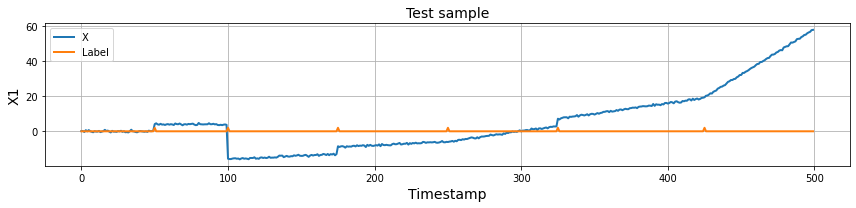

In [11]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*2, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

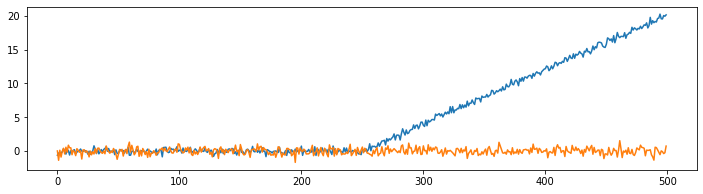

In [14]:
plt.figure(figsize=(12, 3.))
X1, L1 = relu_plus_steps(steps_locations=[-6,-6,-6, -6, -6], relu_locations=[0,0])
X2, L2 = datasetStep(amp=0)
T = np.arange(X1.shape[0])
df = pd.DataFrame()
df['Time'] = T
df['X1'] = X1[:, 0]
df['X2'] = X2[:, 0]
df['Label'] = np.logical_or(L1, L2).astype(int)
if UPDATE_DATASETS: df.to_csv(dir_path+"sample_12.csv", index=False)
plt.plot(X1)
plt.plot(X2)

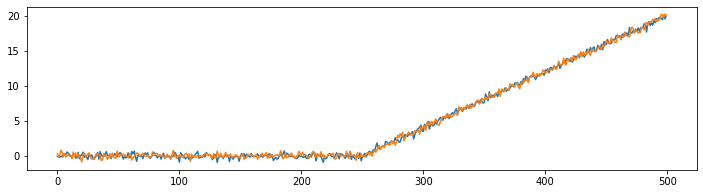

In [15]:
plt.figure(figsize=(12, 3.))
X1, L1 = relu_plus_steps(steps_locations=[-6,-6,-6, -6, -6], relu_locations=[0,0])
X2, L2 = relu_plus_steps(steps_locations=[-6,-6,-6, -6, -6], relu_locations=[0,0])
T = np.arange(X1.shape[0])
df = pd.DataFrame()
df['Time'] = T
df['X1'] = X1[:, 0]
df['X2'] = X2[:, 0]
df['Label'] = np.logical_or(L1, L2).astype(int)
if UPDATE_DATASETS: df.to_csv(dir_path+"sample_13.csv", index=False)
plt.plot(X1)
plt.plot(X2)

# Synthetic dataset 9

In [114]:
def dataset2DStepPlusNoise(noise=None,step_amps=[0., 0.],size=500,normalize=False):
    t = np.linspace(-10,10,size)
    D = 2
    if noise is None: noise = np.zeros((size,D))
    X = np.stack([np.where(t>0,amp*np.ones_like(t),np.zeros_like(t)) for amp in step_amps])
    X = X.transpose() + noise
    if normalize: X = (X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
    n_obs = X.shape[0]
    y = np.zeros(n_obs)
    y[size//2] = 1
    return X, y

In [115]:
dir_path = f"{DATA_DIR}/synthetic_dataset_9/"

import os
if not os.path.isdir(dir_path):
    os.mkdir(dir_path)

noise_amp = 0.1
size=500
t = np.linspace(-10,10,size)

    
for i, amp in enumerate([[0., 5.], [5., 5.]]):
    X, L = dataset2DStepPlusNoise(noise=noise_amp*np.random.randn(size,2), step_amps=amp)
    T = np.arange(len(X))

    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['X2'] = X[:, 1]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

In [116]:

noises = []



# 2 components of 2D gaussian noise are changed
noise_amps = [[1., 5.], [1., 6.]]
noise = np.random.randn(size, 2)*np.stack([np.where(t>0,amp[1]*np.ones_like(t),amp[0]*np.ones_like(t)) 
                                           for amp in noise_amps]).transpose() # 2D Gaussian with step
noises.append(noise_amp * noise)

# 1 component of 2D gaussian noise is changed
noise_amps = [[1., 1.], [1., 5.]]
noise = np.random.randn(size, 2)*np.stack([np.where(t>0,amp[1]*np.ones_like(t),amp[0]*np.ones_like(t)) 
                                           for amp in noise_amps]).transpose() # 2D Gaussian with step
noises.append(noise_amp * noise)

# covariation of multivariate 2D gaussian is changed
noise = np.zeros((size, 2))
noise[:size//2] = np.random.multivariate_normal(mean=[0., 0.], cov=[[10.,1.], [1., 10.]], size=size//2)
noise[size//2:] = np.random.multivariate_normal(mean=[0., 0.], cov=[[1.,.5], [.5, 4.]], size=size-size//2)

noises.append(noise_amp * noise)


# Gumbel component is changed (2nd component is gaussian)
noise = np.stack([np.random.randn(size),
          np.where(t>0, np.random.gumbel(0, 1, size), np.random.gumbel(0, 5, size)) 
         ]).transpose()

noises.append(noise_amp * noise)

# Gumbel component is changed (2nd component is gumbel)
noise = np.stack([np.random.gumbel(0, 1, size),
          np.where(t>0, np.random.gumbel(0, 1, size), np.random.gumbel(0, 5, size)) 
         ]).transpose()

noises.append(noise_amp * noise)


# Both gumbel components are changed
noise = np.stack([np.where(t>0, np.random.gumbel(0, 1, size), np.random.gumbel(0, 6, size)),
          np.where(t>0, np.random.gumbel(0, 1, size), np.random.gumbel(0, 5, size)) 
         ]).transpose()

noises.append(noise_amp * noise)



for i, noise in enumerate(noises):
    X, L = dataset2DStepPlusNoise(noise)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['X2'] = X[:, 1]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i+2), index=False)

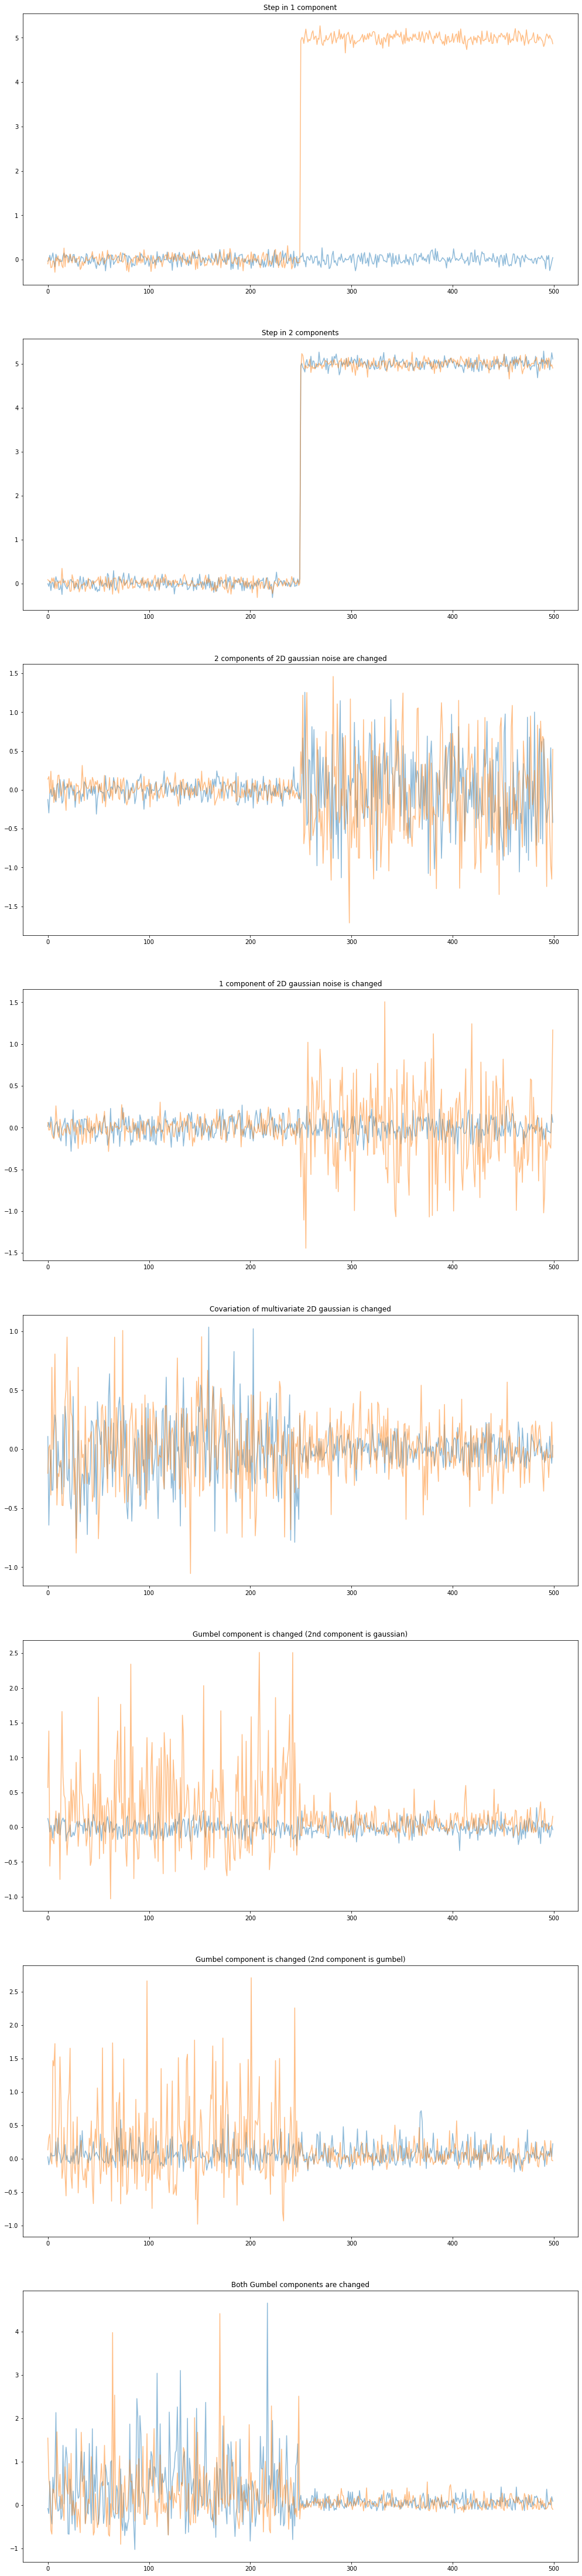

In [120]:
from glob import glob

samples = sorted(glob(dir_path + '*.csv'))
fig = plt.figure(figsize=(17,10*len(samples)))
for i, sample in enumerate(samples):
    plt.subplot(len(samples), 1, i+1)
    plt.title(sample_descriptions[i])
    df = pd.read_csv(sample)
    X = df[[col for col in df.columns if 'X' in col]]
    plt.plot(X, alpha=0.5)
#     break

In [98]:
fig.savefig('2D.pdf')

In [ ]:
# np.random.gumbel(mu, beta, 1000)
# np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 100]], 5000)

# Moons

In [35]:
def get_label(L):
    L_new = [0]
    for i in range(1, len(L)):
        if L[i] == L[i-1]:
            L_new.append(0)
        else:
            L_new.append(1)
    return np.array(L_new)

In [36]:
from sklearn.datasets import make_moons

def gen_time_series(n=5, n_samples=4000):
    
    XX = []
    yy = []
    
    for i in range(n):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.2, random_state=None)
        X = X[y.argsort()]
        y = y[y.argsort()]
        XX.append(X)
        yy.append(y)
        
    X = np.concatenate(tuple(XX), axis=0)
    y = np.concatenate(tuple(yy), axis=0)
    L = get_label(y)
    return X, L

In [39]:
dir_path = f"{DATA_DIR}/moons/"

for i in range(10):
    
    X, L = gen_time_series(n=5, n_samples=100)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['X2'] = X[:, 1]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

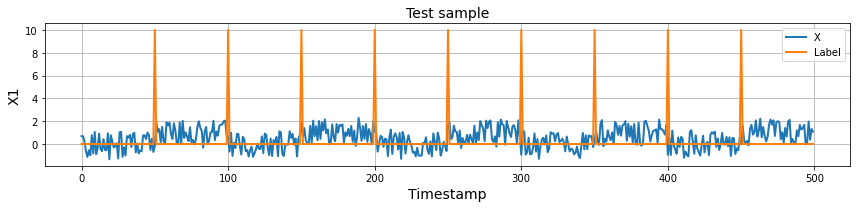

In [40]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# UCI 1
https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+

In [41]:
import os

def get_files_list(path):
    files = []
    for aname in os.listdir(path):
        if aname[-3:] == "csv" or aname[-3:] == "txt": files.append(os.path.join(path, aname))
    return files


def remove_char(fname):
    with open(fname, "r") as f:
        flist = f.readlines()
        flist = [s.replace(';', '') for s in flist]
    with open(fname, "w") as f:
        f.writelines(flist)

In [43]:
dir_path = f"{DATA_DIR}/wisdm/"

uci_path = f"{SOURCE_DATA_DIR}/wisdm-dataset/raw/watch/accel/"
files = get_files_list(uci_path)

for num, afile in enumerate(files[:10]):
    remove_char(afile)
    data = pd.read_csv(afile, index_col=False, header=None, escapechar=";")
    
    L = get_label(data[1].values)
    X  = data[[3, 4, 5]].values.astype(np.float)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (num), index=False)

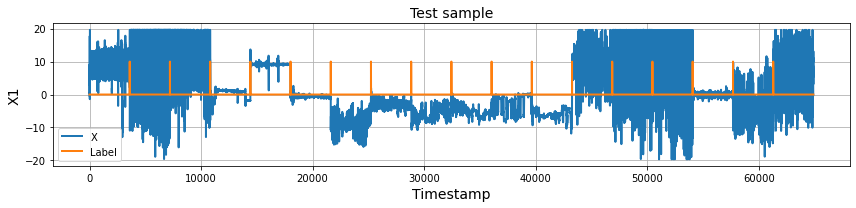

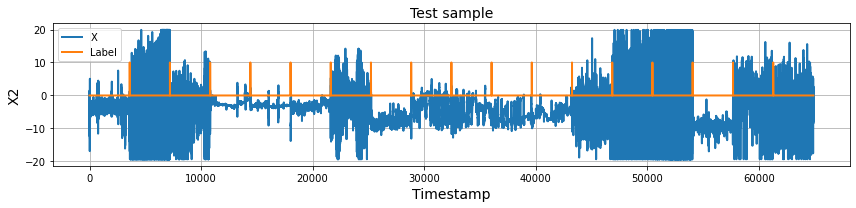

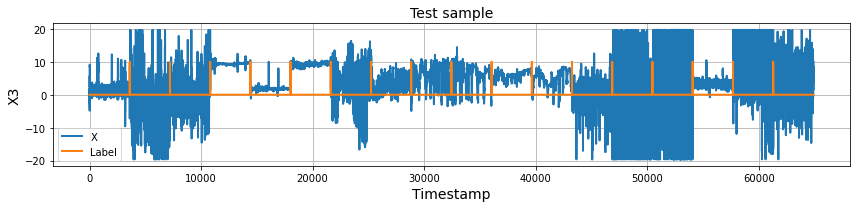

In [44]:
# Display test sample
for i in range(X.shape[1]):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# UCI 2

https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set

In [45]:
dir_path = f"{DATA_DIR}/EMG_Physical_Action_Data_Set/"

uci_paths = [f"{SOURCE_DATA_DIR}/EMG Physical Action Data Set/sub1/Normal/txt", 
             f"{SOURCE_DATA_DIR}/EMG Physical Action Data Set/sub2/Normal/txt", 
             f"{SOURCE_DATA_DIR}/EMG Physical Action Data Set/sub3/Normal/txt", 
             f"{SOURCE_DATA_DIR}/EMG Physical Action Data Set/sub4/Normal/txt"]

for num, apath in enumerate(uci_paths):
    files = get_files_list(apath)
    files.sort()
    
    dfs = []
    for n, afile in enumerate(files):
        df = pd.read_csv(afile, index_col=False, header=None, sep='\t')
        df[8] = n
        dfs.append(df)
    data = pd.concat(dfs, axis=0)

    L = get_label(data[8].values)
    X  = data[[0, 1, 2, 3, 4, 5, 6, 7]].values.astype(np.float)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (num), index=False)

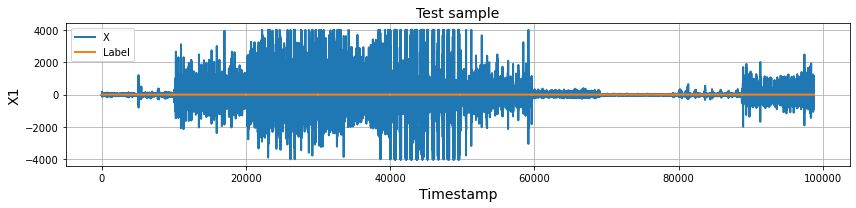

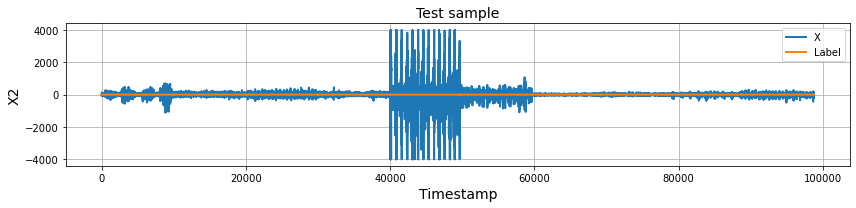

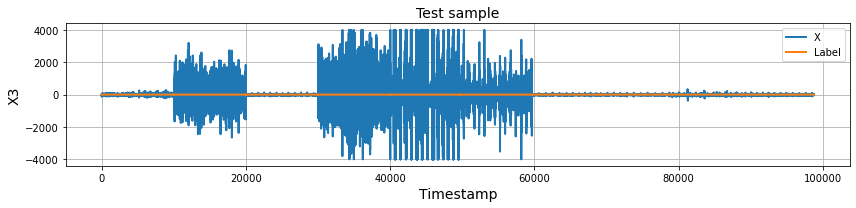

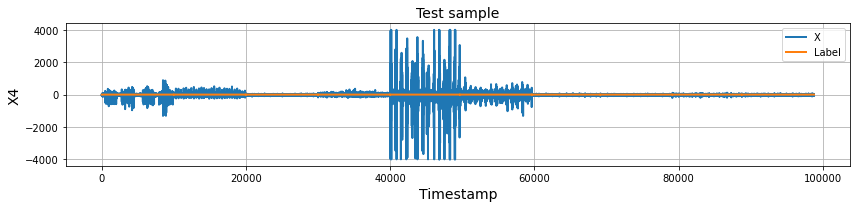

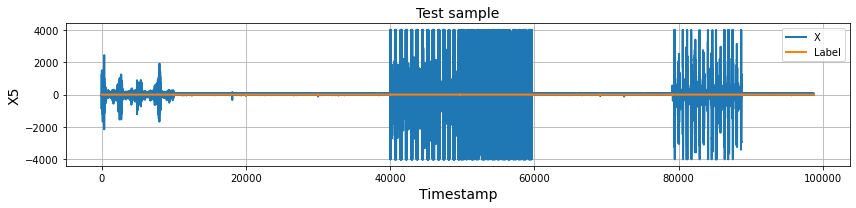

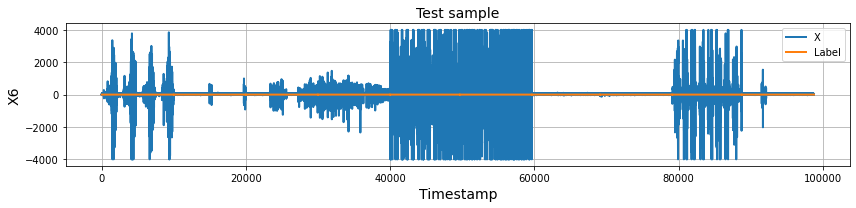

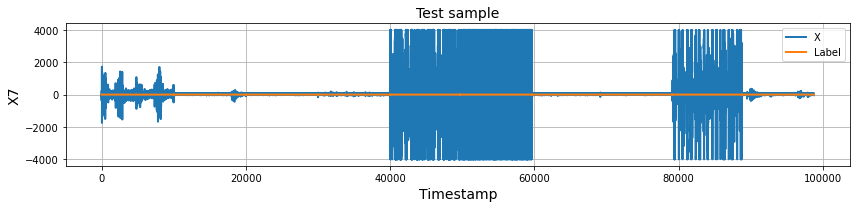

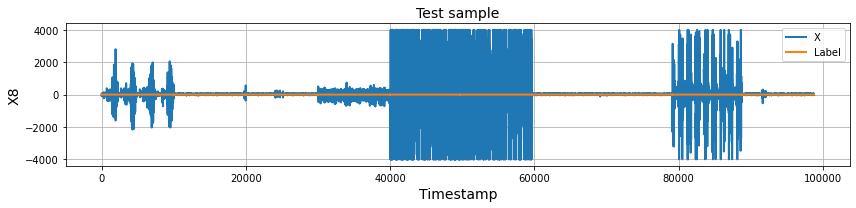

In [46]:
# Display test sample
for i in range(X.shape[1]):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [47]:
len(dfs)

10

# MNIST 8x8

In [33]:
from sklearn.datasets import load_digits

def get_mnist_time_series():
    X, y = load_digits(return_X_y=True)
    inds = np.arange(len(X))
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]

    X = X[y.argsort()]
    y = y[y.argsort()]
    L = get_label(y)
    
    return X, L

In [34]:
dir_path = f"{DATA_DIR}/mnist/"

for i in range(10):
    
    X, L = get_mnist_time_series()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

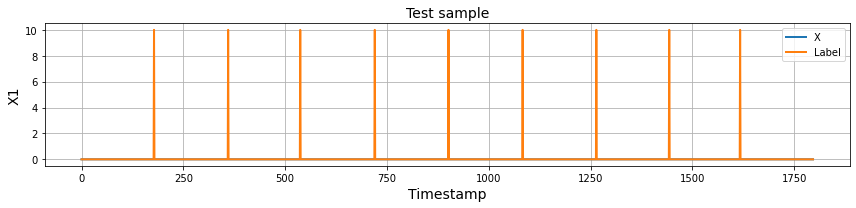

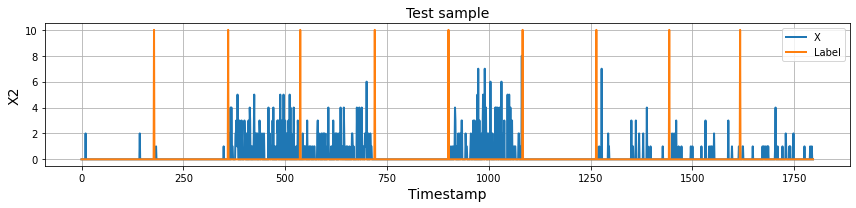

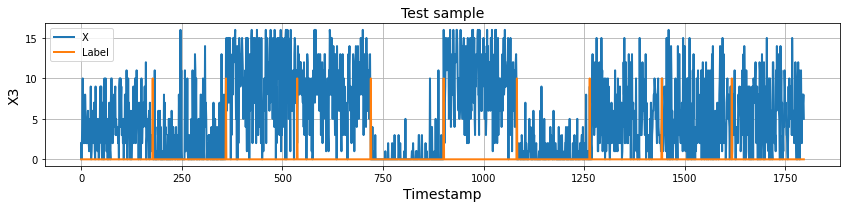

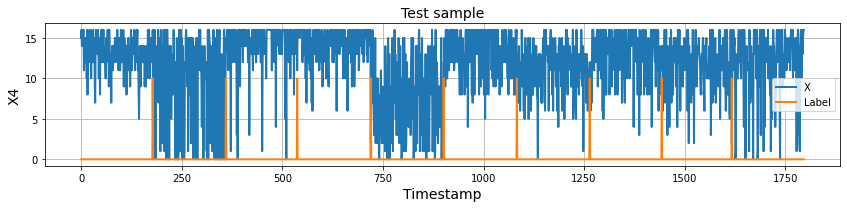

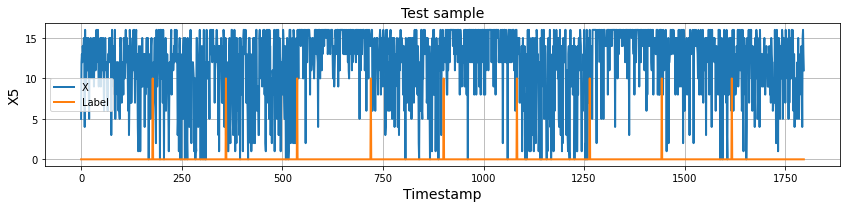

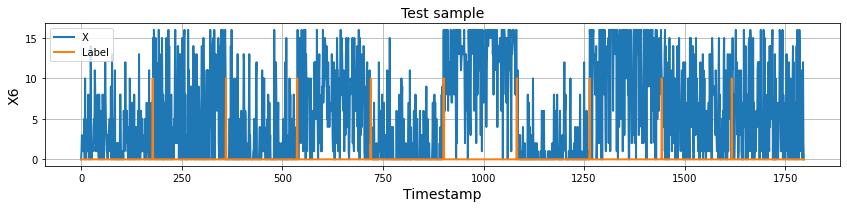

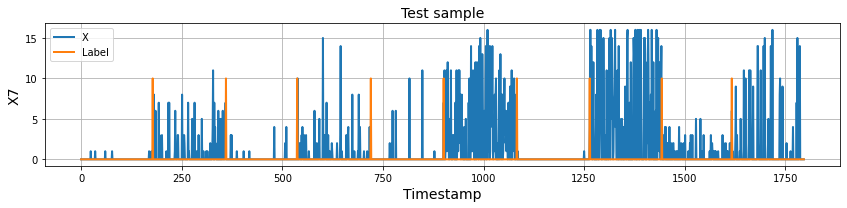

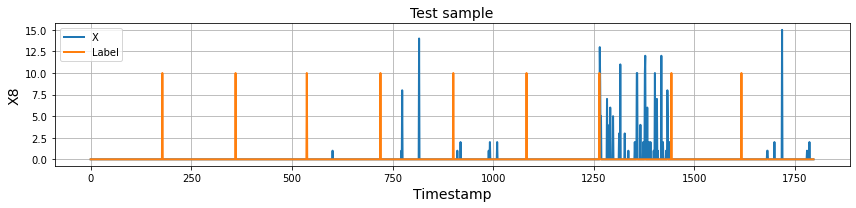

In [35]:
# Display test sample
for i in range(X.shape[1])[:8]:
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# HTRU2

https://archive.ics.uci.edu/ml/datasets/HTRU2

In [48]:
data = pd.read_csv(f"{SOURCE_DATA_DIR}/HTRU2/HTRU_2.csv", header=None)
data.head()

0          1         2         3         4          5          6  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

            7  8  
0   74.242225  0  
1  127.393580  0  
2   63.171909  0  
3   53.593661  0  
4  252.567306  0

In [49]:
data_x = data[np.arange(8)].values
data_y = data[8].values

X_0 = data_x[data_y == 0]
X_1 = data_x[data_y == 1]

print("X_0: ", X_0.shape)
print("X_1: ", X_1.shape)

X_0:  (16259, 8)
X_1:  (1639, 8)


In [50]:
def get_htru2_time_series(n=5, state_size=200):
    
    Xs = []
    ys = []
    for i in range(n):
        ix = X_0[np.random.choice(np.arange(len(X_0)), state_size)]
        iy = np.zeros(len(ix))
        Xs.append(ix)
        ys.append(iy)
        ix = X_1[np.random.choice(np.arange(len(X_1)), state_size)]
        iy = np.ones(len(ix))
        Xs.append(ix)
        ys.append(iy)

    X = np.concatenate(tuple(Xs), axis=0)
    y = np.concatenate(tuple(ys), axis=0)
    L = get_label(y)
    
    return X, L

In [51]:
dir_path = f"{DATA_DIR}/htru2/"

for i in range(10):
    
    X, L = get_htru2_time_series()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

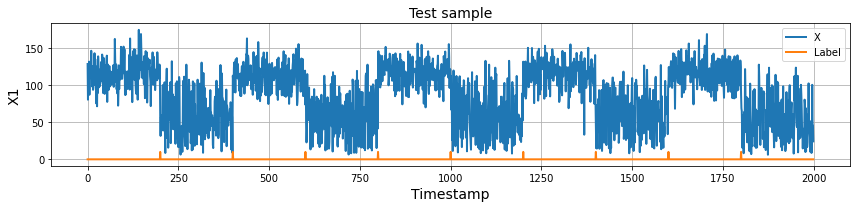

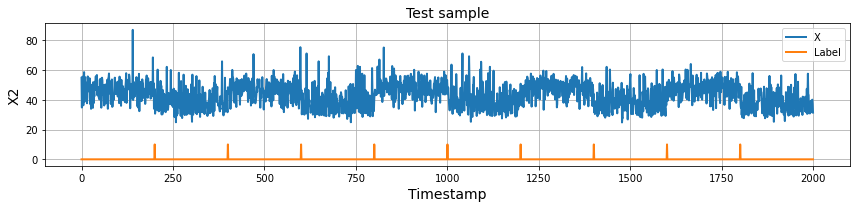

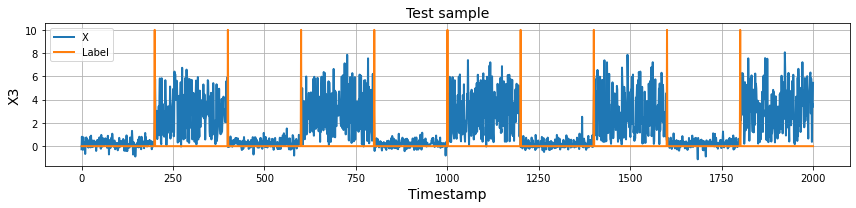

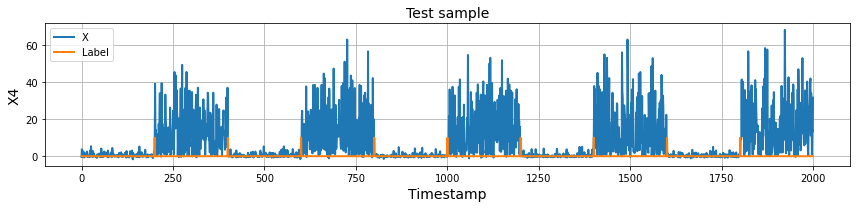

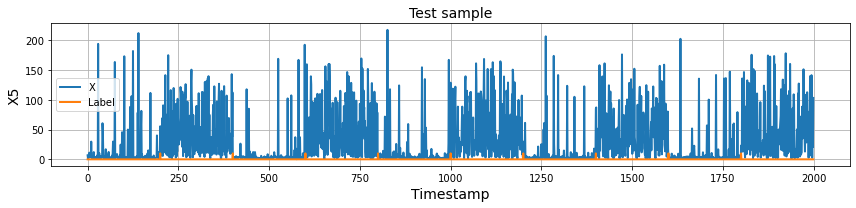

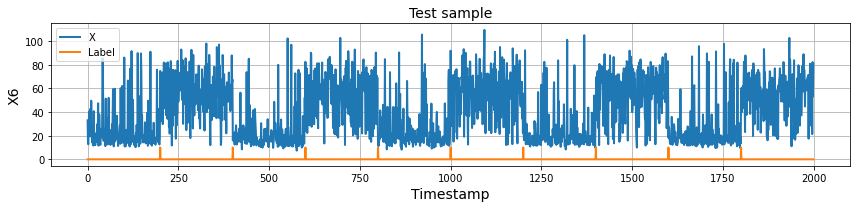

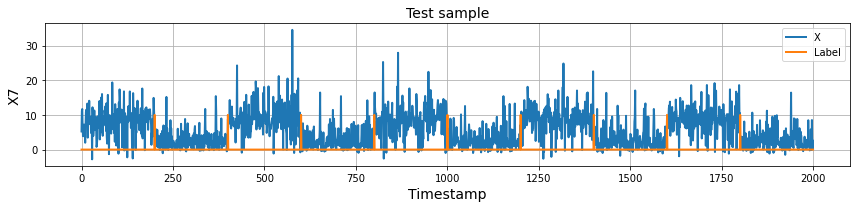

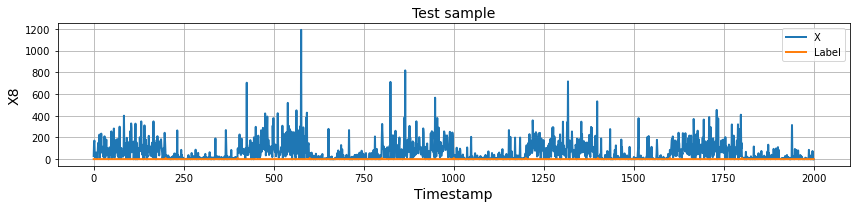

In [52]:
# Display test sample
for i in range(X.shape[1]):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# MAGIC

https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

In [53]:
data = pd.read_csv(f"{SOURCE_DATA_DIR}/MAGIC/magic04.data", header=None)
data.head()

0         1       2       3       4         5        6        7   \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

        8         9  10  
0  40.0920   81.8828  g  
1   6.3609  205.2610  g  
2  76.9600  256.7880  g  
3  10.4490  116.7370  g  
4   4.6480  356.4620  g

In [54]:
data_x = data[np.arange(10)].values
data_y = data[10].values

X_0 = data_x[data_y == 'g']
X_1 = data_x[data_y != 'g']

print("X_0: ", X_0.shape)
print("X_1: ", X_1.shape)

X_0:  (12332, 10)
X_1:  (6688, 10)


In [55]:
def get_magic_time_series(n=5, state_size=200):
    
    Xs = []
    ys = []
    for i in range(n):
        ix = X_0[np.random.choice(np.arange(len(X_0)), state_size)]
        iy = np.zeros(len(ix))
        Xs.append(ix)
        ys.append(iy)
        ix = X_1[np.random.choice(np.arange(len(X_1)), state_size)]
        iy = np.ones(len(ix))
        Xs.append(ix)
        ys.append(iy)

    X = np.concatenate(tuple(Xs), axis=0)
    y = np.concatenate(tuple(ys), axis=0)
    L = get_label(y)
    
    return X, L

In [56]:
dir_path = f"{DATA_DIR}/magic/"

for i in range(10):
    
    X, L = get_magic_time_series()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

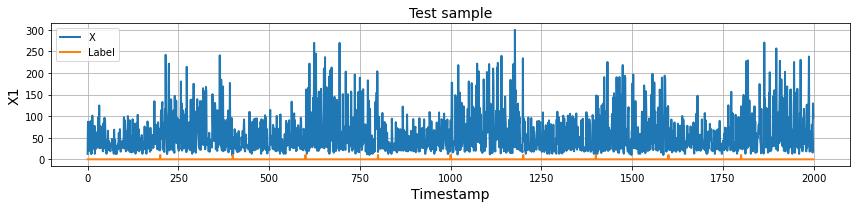

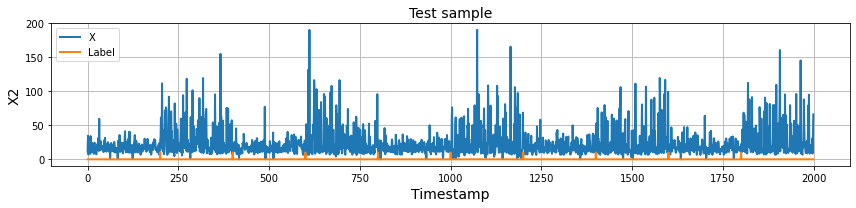

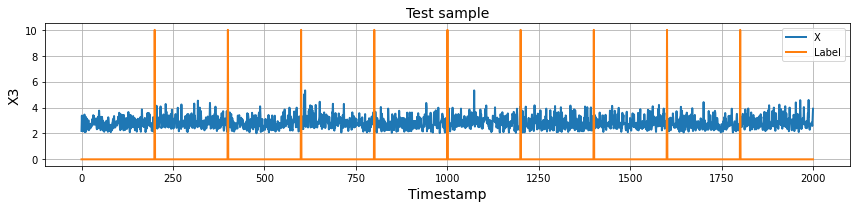

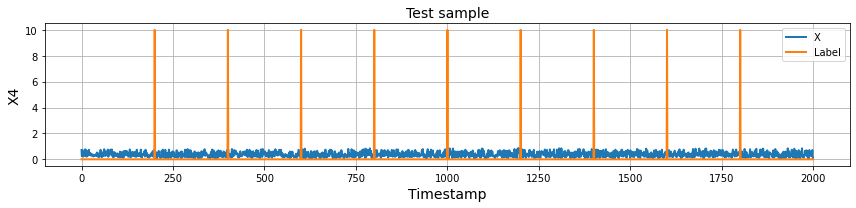

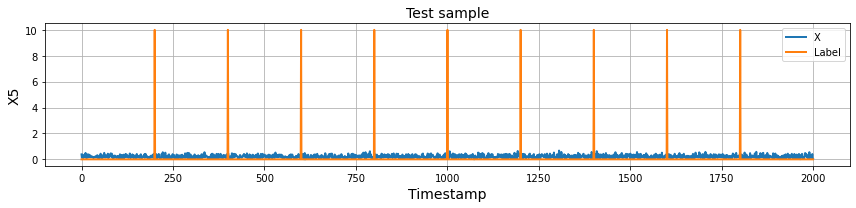

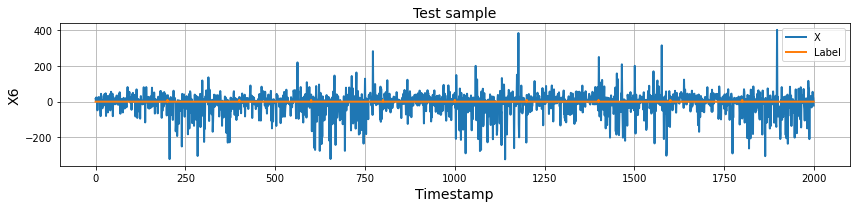

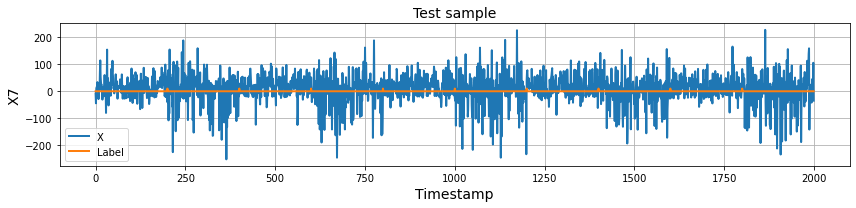

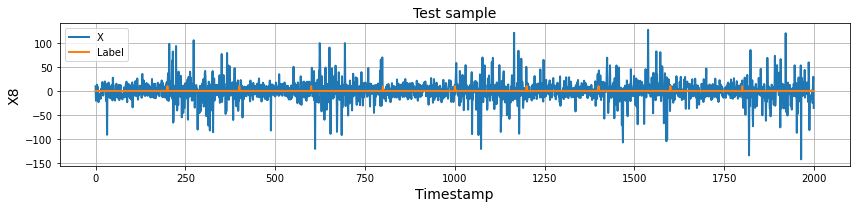

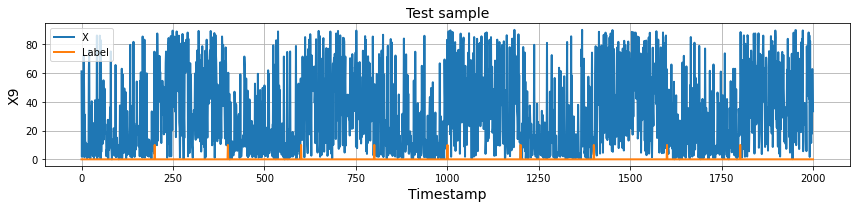

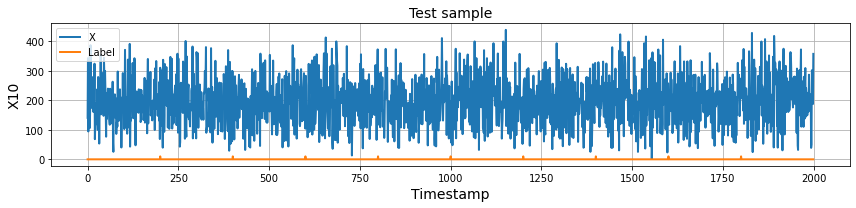

In [58]:
# Display test sample
for i in range(X.shape[1]):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# SUSY

https://archive.ics.uci.edu/ml/datasets/SUSY

In [59]:
data = pd.read_csv(f"{SOURCE_DATA_DIR}/SUSY/SUSY.csv.gz", nrows=10**6, header=None)
data.head()

0         1         2         3         4         5         6         7   \
0  0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309  0.567765   
1  1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543  3.475464   
2  1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661  1.219918   
3  1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328  2.033060   
4  1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907  1.087562   

         8         9         10        11        12        13        14  \
0 -0.175000  0.810061 -0.252552  1.921887  0.889637  0.410772  1.145621   
1 -1.219136  0.012955  3.775174  1.045977  0.568051  0.481928  0.000000   
2  0.504026  1.831248 -0.431385  0.526283  0.941514  1.587535  2.024308   
3  1.533041  3.046260 -1.005285  0.569386  1.015211  1.582217  1.551914   
4 -0.381742  0.589204  1.365479  1.179295  0.968218  0.728563  0.000000   

         15        16        17        18  
0  1.932632  0.994464  1.367815  0.040714  
1  0.448410  0.205356  1.321893  0.377584  
2  0.603498  1.562374  1.135454  0.180910  
3  0.761215  1.715464  1.492257  0.090719  
4  1.083158  0.043429  1.154854  0.094859

In [60]:
data.shape

(1000000, 19)

In [61]:
data_x = data[np.arange(1, 19)].values
data_y = data[0].values

X_0 = data_x[data_y == 0]
X_1 = data_x[data_y == 1]

print("X_0: ", X_0.shape)
print("X_1: ", X_1.shape)

X_0:  (542075, 18)
X_1:  (457925, 18)


In [62]:
def get_susy_time_series(n=5, state_size=200):
    
    Xs = []
    ys = []
    for i in range(n):
        ix = X_0[np.random.choice(np.arange(len(X_0)), state_size)]
        iy = np.zeros(len(ix))
        Xs.append(ix)
        ys.append(iy)
        ix = X_1[np.random.choice(np.arange(len(X_1)), state_size)]
        iy = np.ones(len(ix))
        Xs.append(ix)
        ys.append(iy)

    X = np.concatenate(tuple(Xs), axis=0)
    y = np.concatenate(tuple(ys), axis=0)
    L = get_label(y)
    
    return X, L

In [63]:
dir_path = f"{DATA_DIR}/susy/"

for i in range(10):
    
    X, L = get_susy_time_series()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

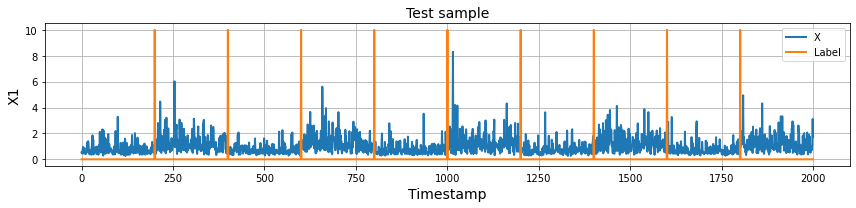

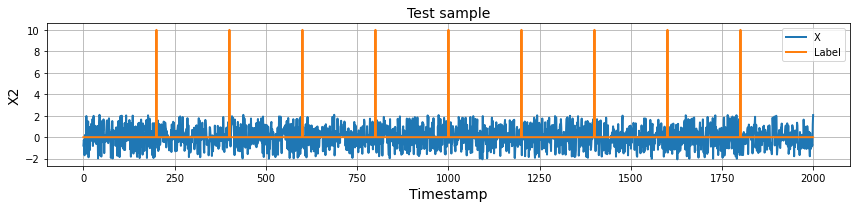

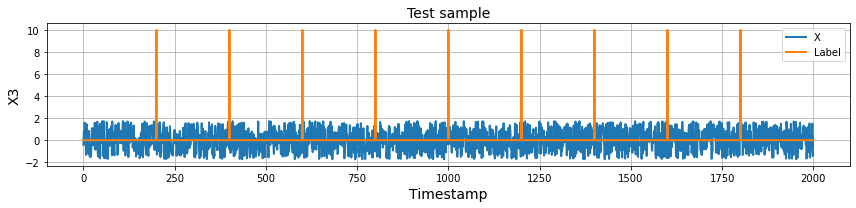

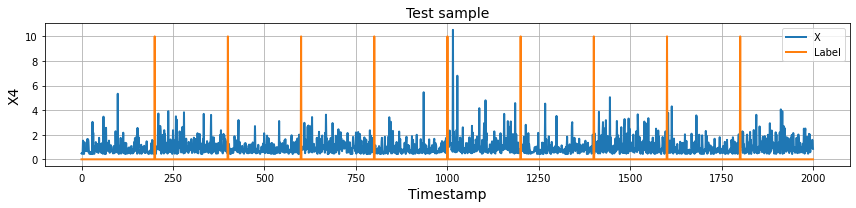

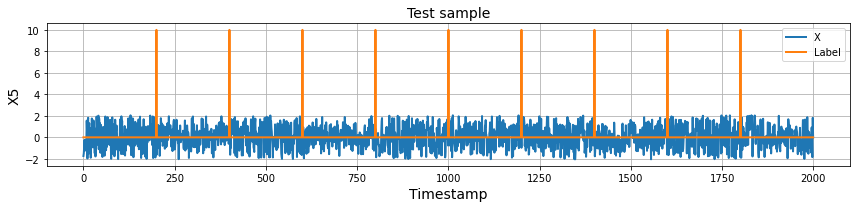

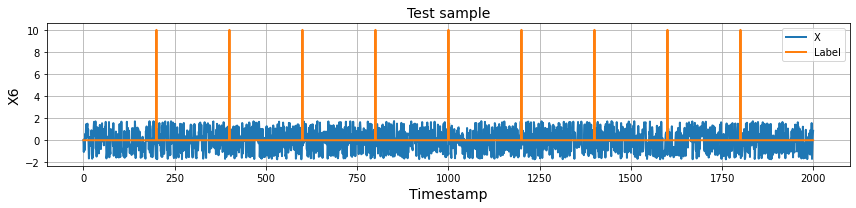

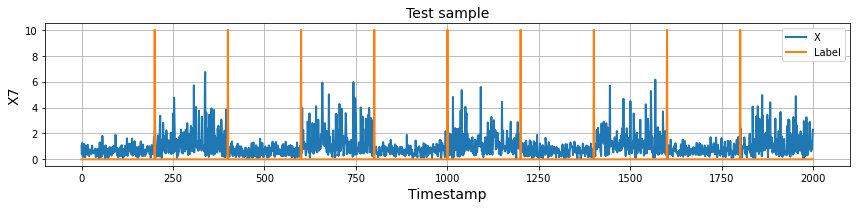

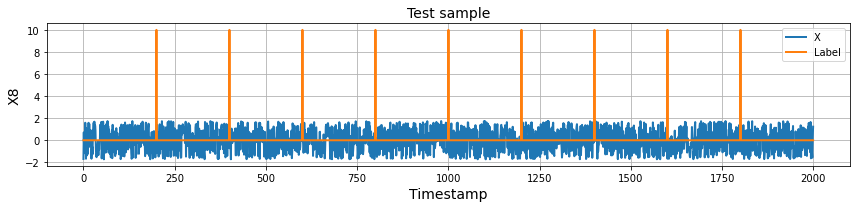

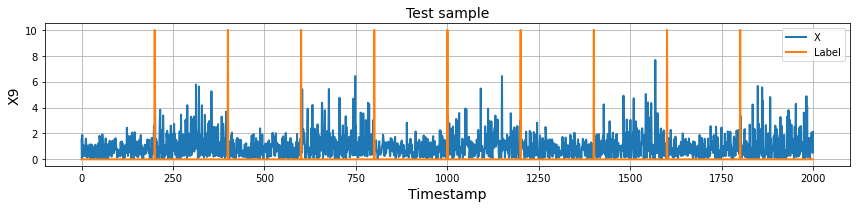

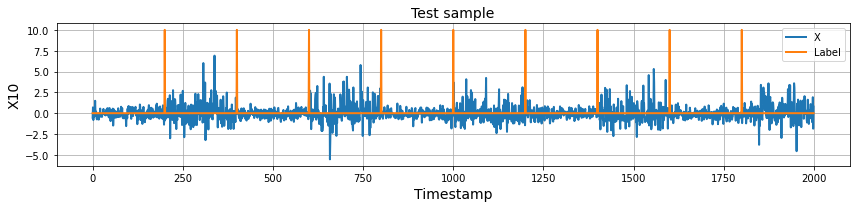

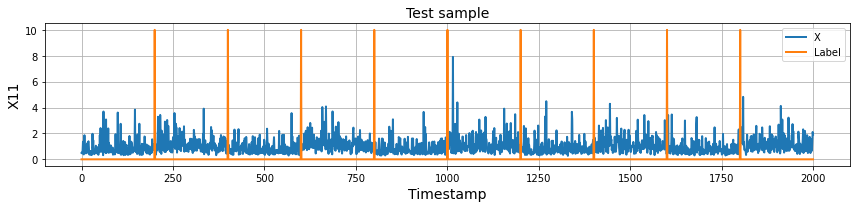

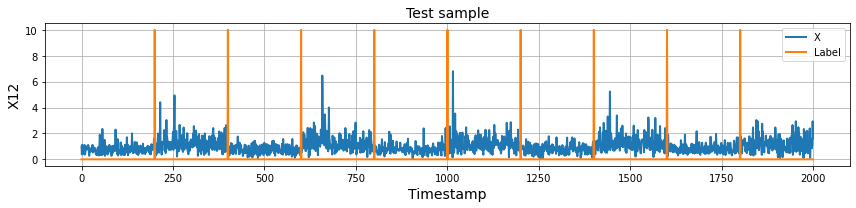

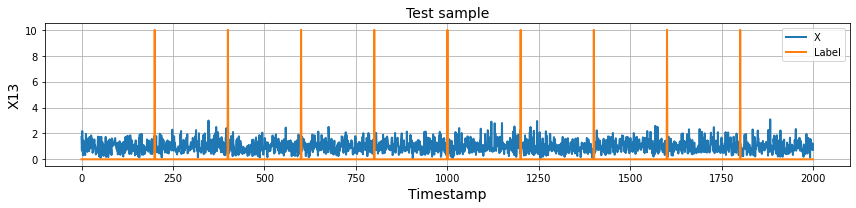

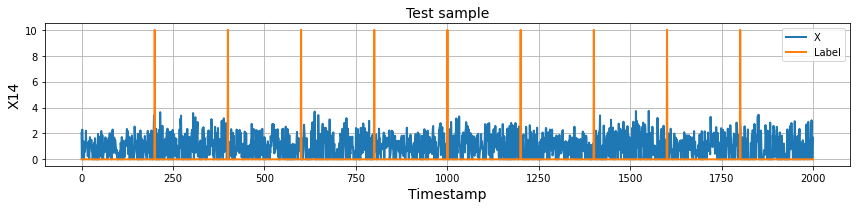

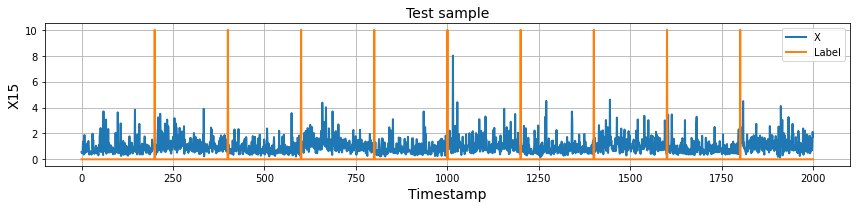

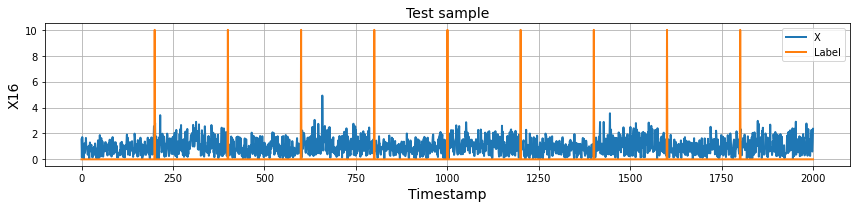

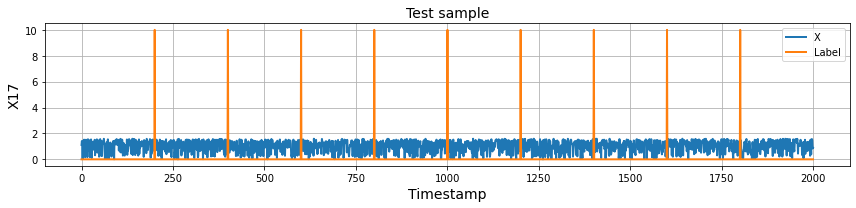

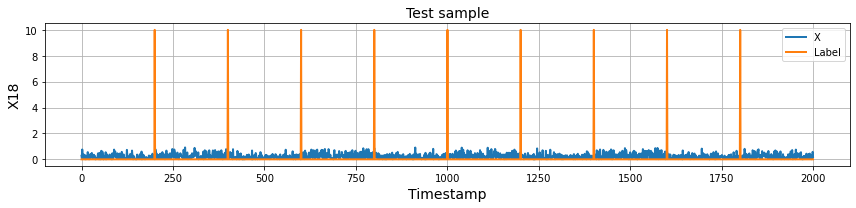

In [64]:
# Display test sample
for i in range(X.shape[1]):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(b=1)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Higgs
https://archive.ics.uci.edu/ml/datasets/HIGGS

In [65]:
data = pd.read_csv(f"{SOURCE_DATA_DIR}/HIGGS/HIGGS.csv.gz", nrows=10**6, header=None)
data.head()

0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26        27        28  
0  0.978076  0.920005  0.721657  0.988751  0.876678  
1  0.985700  0.978098  0.779732  0.992356  0.798343  
2  0.985692  0.951331  0.803252  0.865924  0.780118  
3  0.998656  0.728281  0.869200  1.026736  0.957904  
4  0.986610  0.838085  1.133295  0.872245  0.808487  

[5 rows x 29 columns]

In [66]:
data_x = data[np.arange(1, 29)].values
data_y = data[0].values

X_0 = data_x[data_y == 0]
X_1 = data_x[data_y == 1]

print("X_0: ", X_0.shape)
print("X_1: ", X_1.shape)

X_0:  (470327, 28)
X_1:  (529673, 28)


In [67]:
def get_higgs_time_series(n=5, state_size=200):
    
    Xs = []
    ys = []
    for i in range(n):
        ix = X_0[np.random.choice(np.arange(len(X_0)), state_size)]
        iy = np.zeros(len(ix))
        Xs.append(ix)
        ys.append(iy)
        ix = X_1[np.random.choice(np.arange(len(X_1)), state_size)]
        iy = np.ones(len(ix))
        Xs.append(ix)
        ys.append(iy)

    X = np.concatenate(tuple(Xs), axis=0)
    y = np.concatenate(tuple(ys), axis=0)
    L = get_label(y)
    
    return X, L

In [68]:
dir_path = f"{DATA_DIR}/higgs/"

for i in range(10):
    
    X, L = get_higgs_time_series()
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    for k in range(X.shape[1]):
        df['X'+str(k+1)] = X[:, k]
    df['Label'] = L
    if UPDATE_DATASETS: df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)